In [1]:
import pylab as plt 
import pandas as pd
import numpy as np
from astropy.constants import R_earth, m_e, c
from astropy import units
from tqdm import tqdm
from scipy.constants import elementary_charge

In [2]:
from plotting_utils import add_earth

In [3]:
def plot(df_sub, fname=None):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'z{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Z (SM)')
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.xlim(-1, 7)
    plt.ylim(-3, 3)
    add_earth()
    plt.gca().set_aspect("equal")
        
    plt.subplot(122)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'y{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Y (SM)')
    plt.xlim(-1, 7)
    plt.ylim(-7, 7)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    add_earth()
    plt.gca().set_aspect("equal")
    
    if fname:
        plt.savefig(fname)
        plt.close()


In [4]:
df = pd.read_csv('data/test_dipole.csv')
print(len(df.index))

39


In [5]:
df.head()

,Unnamed: 0,t0,x0,y0,z0,ppar0,B0,W0,h0,t50,...,W400,h400,t450,x450,y450,z450,ppar450,B450,W450,h450
0,0,0.883531,5.985054,0.009959,0.300099,0.405785,-11.141606,0.197499,0.008815,0.883681,...,0.196813,0.008828,0.884890,5.998554,0.009995,0.300755,0.405808,-11.064420,0.196727,0.008829
1,1,1.771616,5.926245,0.019451,0.591664,0.395756,-11.475884,0.197516,0.008970,1.771913,...,0.196857,0.008982,1.774300,5.939600,0.019523,0.592974,0.395844,-11.399553,0.196775,0.008983
2,2,2.682180,5.827019,0.028142,0.868731,0.377462,-12.061572,0.197522,0.009277,2.682600,...,0.196864,0.009287,2.686036,5.840085,0.028244,0.870650,0.377668,-11.981814,0.196782,0.009288
3,3,3.634042,5.693163,0.035788,1.125347,0.349526,-12.894047,0.197445,0.009813,3.634534,...,0.196775,0.009818,3.638744,5.705927,0.035914,1.127876,0.349943,-12.807854,0.196696,0.009819
4,4,4.658697,5.530961,0.042350,1.356646,0.308961,-14.009254,0.197548,0.010787,4.659156,...,0.196897,0.010784,4.663515,5.543291,0.042492,1.359725,0.309702,-13.917717,0.196816,0.010783


Text(0.5, 0, 'Time (seconds)')

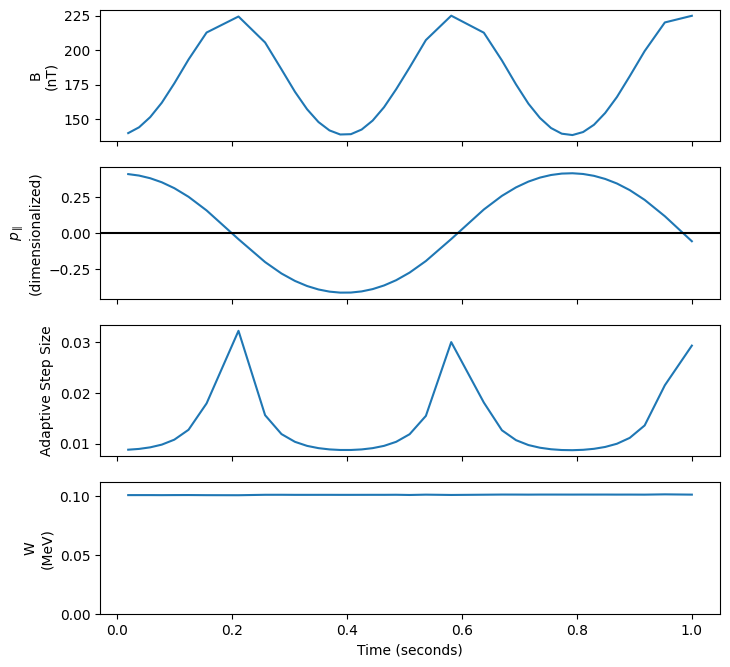

In [6]:
sf = c / R_earth
t = (df['t0'].values / sf).to(units.s).value

q = - elementary_charge * units.C
sf = (q * R_earth / (m_e * c**2))
B = (df['B0'].values * units.s/ R_earth / sf).to(units.nT)

p = df['ppar0'].values
W = (df['W0'].values * (m_e * c**2)).to(units.MeV).value

fig, axes = plt.subplots(4, 1,sharex=True, figsize=(8, 8), dpi=100)
axes[0].plot(t, B, '-')
axes[0].set_ylabel('B\n(nT)')
axes[1].plot(t, p, '-')
axes[1].set_ylabel(r'$p_\parallel$' +'\n(dimensionalized)')
axes[1].axhline(0, color='k')
axes[2].plot(t, df['h0'], '-')
axes[2].set_ylabel('Adaptive Step Size')
axes[3].plot(t, W, '-')
axes[3].set_ylabel('W\n(MeV)')
axes[3].set_ylim(0, W.max() * 1.1)
axes[3].set_xlabel('Time (seconds)')

In [48]:
W

array([6.85713908, 6.8571386 , 6.8571374 , ..., 6.85459654, 6.85459249,
       6.85458843])

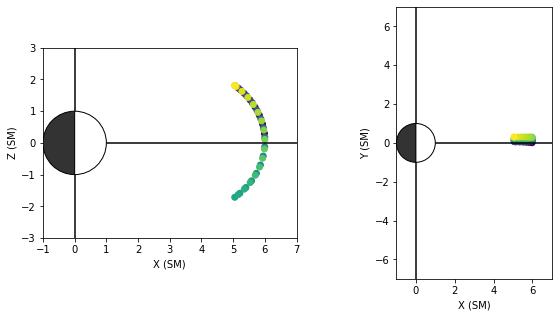

In [7]:
plot(df)

In [ ]:
import joblib
tasks = []

for i in range(len(df.index)):
    tasks.append(joblib.delayed(plot)(df.iloc[i:i+100], 'plots/%04d.png' % i))
    
print(f'Tasks: {len(tasks)}')

joblib.Parallel(n_jobs=-1, verbose=1)(tasks)

Tasks: 81671


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |